<a href="https://colab.research.google.com/github/jimmyjoy43/Predicting-Pharma-Sales-Using-Neural-Networks/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
clear ; close all; clc

# Predicting Pharma Sales Using Neural Networks


## Loading sales figures for Janus Kinase inhibitor drugs 

In [ ]:
%loading sales figs data

sales_figs = readtable('C:\Users\Jimmy\Google Drive\Career\Job Apps\Insight_\Interview\Case Interview\Inhibitor_sales_figs.txt');


In [ ]:
sales_figs(:,:)


ans =

  33x10 table

    LongName     Quarter     Jakafi_Incyte    Jakafi_Incyte_1    Jakafi_Novartis    Jakafi    Xeljanz    Olumiant_Incyte    Olumiant_EliLilly    Olumiant
    ________    _________    _____________    _______________    _______________    ______    _______    _______________    _________________    ________

        1       '2011 Q1'            0                0                  0              0         0              0                   0                0  
        2       '2011 Q2'            0                0                  0              0         0              0                   0                0  
        3       '2011 Q3'            0                0                  0              0         0              0                   0                0  
        4       '2011 Q4'            2                0                  0              2         0              0                   0                0  
        5       '2012 Q1'         19.3              

Current plot held



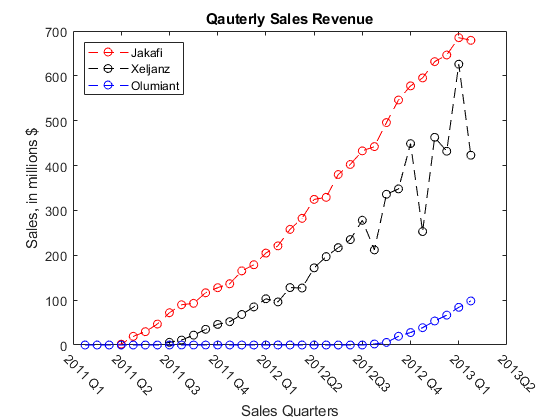

In [ ]:
Quarters = sales_figs(:,1); 

q=table2array(sales_figs(:,2));
t=(0.25:0.25:8.25); % renormalizing t in years 
J= table2array(sales_figs(:,6));
X= table2array(sales_figs(:,7));
O= table2array(sales_figs(:,10));

plot(t,J,'r--o')
hold 
plot(t,X,'k--o')
plot(t,O,'b--o')

title('Qauterly Sales Revenue')
xlabel('Sales Quarters')
ylabel('Sales, in millions $')
xticklabels(q)
xtickangle(315)
legend('Jakafi','Xeljanz','Olumiant','Location','NorthWest')

## Fitting quaterly sales revenue to Bass Diffusion Model 


In [ ]:
%Bass model fitting annual sales

%for J

options = optimset('lsqcurvefit');
options.Algorithm = ('levenberg-marquardt');
options.MaxIter = 1e9;
options.MaxFunEvals=1e9;
% options.TolFun=1e-9;
options.TolX=1e-60;

F_J=@(xJ,t) xJ(3)*((xJ(1))^-1)*((xJ(1)+xJ(2))^2)*(1+((xJ(2)/xJ(1)).*exp(-(xJ(1)*t)-(xJ(2)*t)))).^-2.*(exp(-(xJ(1)*t)-(xJ(2)*t)));    

x0_J=[0.03; 0.38; 10000];
[xJ,resnorm,~,exitflag,output] = lsqcurvefit(F_J,x0_J,t,J',[],[],options);

%for X

F_X=@(xX,t) xX(3)*((xX(1))^-1)*((xX(1)+xX(2))^2)*(1+((xX(2)/xX(1)).*exp(-(xX(1)*t)-(xX(2)*t)))).^-2.*(exp(-(xX(1)*t)-(xX(2)*t)));     

x0_X=[0.03; 0.38; 100000];
[xX,resnorm,~,exitflag,output] = lsqcurvefit(F_X,x0_X,t,X',[],[],options);

%for O

F_O=@(xO,t) xO(3)*((xO(1))^-1)*((xO(1)+xO(2))^2)*(1+((xO(2)/xO(1)).*exp(-(xO(1)*t)-(xO(2)*t)))).^-2.*(exp(-(xO(1)*t)-(xO(2)*t)));      

x0_O=[0.03; 0.38; 100000];
[xO,resnorm,~,exitflag,output] = lsqcurvefit(F_O,x0_O,t,O',[],[],options);






Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the value of the function tolerance.


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the value of the function tolerance.


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the value of the function tolerance.




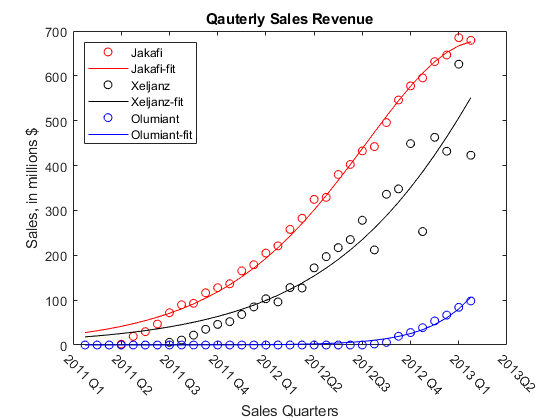

In [ ]:
plot(t,J,'ro')
hold on
plot(t,F_J(xJ,t),'r')
hold on




plot(t,X,'ko')
hold on
plot(t,F_X(xX,t),'k')



plot(t,O,'bo')
hold on
plot(t,F_O(xO,t),'b')

title('Qauterly Sales Revenue')
xlabel('Sales Quarters')
ylabel('Sales, in millions $')
xticklabels(q)
xtickangle(315)
legend('Jakafi','Jakafi-fit','Xeljanz','Xeljanz-fit','Olumiant','Olumiant-fit','Location','NorthWest')


## Predicting future sales by extrpolating model

In [ ]:
%plotting the Bass function sym, in extended t

t1=(0.25:0.25:18.25); % renormalizing t in years 

F_J=xJ(3)*((xJ(1))^-1)*((xJ(1)+xJ(2))^2)*(1+((xJ(2)/xJ(1)).*exp(-(xJ(1)*t1)-(xJ(2)*t1)))).^-2.*(exp(-(xJ(1)*t1)-(xJ(2)*t1)));      

F_X=xX(3)*((xX(1))^-1)*((xX(1)+xX(2))^2)*(1+((xX(2)/xX(1)).*exp(-(xX(1)*t1)-(xX(2)*t1)))).^-2.*(exp(-(xX(1)*t1)-(xX(2)*t1)));  

F_O=xO(3)*((xO(1))^-1)*((xO(1)+xO(2))^2)*(1+((xO(2)/xO(1)).*exp(-(xO(1)*t1)-(xO(2)*t1)))).^-2.*(exp(-(xO(1)*t1)-(xO(2)*t1)));      


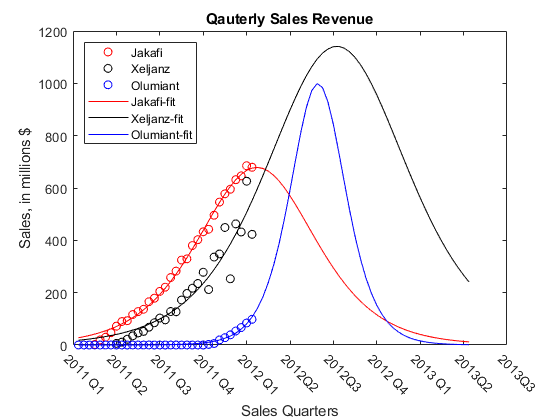

In [ ]:
%plotting the Bass Model Extrapolation 
plot(t,J,'ro')
hold on
plot(t,X,'ko')
plot(t,O,'bo')
plot(t1,F_J,'r')

plot(t1,F_X,'k')
plot(t1,F_O,'b')

title('Qauterly Sales Revenue')
xlabel('Sales Quarters')
ylabel('Sales, in millions $')
xticklabels(q)
xtickangle(315)
legend('Jakafi','Xeljanz','Olumiant','Jakafi-fit','Xeljanz-fit','Olumiant-fit','Location','NorthWest')

### p,q values for Jakafi, Xeljanz and Olumiant


In [ ]:
format shortG
xO(1:2), xX(1:2), xJ(1:2)


ans =

    2.025e-06
        1.176


ans =

    0.0016466
      0.46212


ans =

    0.0049888
      0.55009




## Sample Data Set to Evaluate Machine Learning Models

## Training set: 15 pharmaceutical drugs, historic sales figures and 9 product attributes 

   ### Input: product attributes
       1. Novelty of drug, # of substitutes
       2. Normalized Potential Market Size
       3. Severity of disease 
       4. # of clinical trials 
       5. Dosage strength (mg)
       6. Half life (min)
       7. Bioavailability (%)              
       8. Binding affinity (%)
       9. Price per dose ($)


   ### Output: product diffusion parameters
       - "p"
       - "q"

In [ ]:
clear; clc

t_d = readtable('C:\Users\Jimmy\Google Drive\Career\Job Apps\Insight_\Interview\Case Interview\Training sales data.txt');

T_D=table2array(t_d(:,:));

for i=1:2:size(T_D,2)-1
   
    t(:,ceil(i/2))=T_D(:,i)-T_D(1,i);
    
    I(:,ceil(i/2))=T_D(:,i+1);
    
end

t_d(:,1:10)


ans =

  16x10 table

    Var1    Avastin_Roche    Var3    Rituxan_Genentech    Var5    Herceptin_Genentech    Var7    Lucentis_Genentech    Var9    Enbrel_Amgen
    ____    _____________    ____    _________________    ____    ___________________    ____    __________________    ____    ____________

    2009        3413         2009          2584           2009           1564            2009            964           2002         802    
    2010        3852         2010          2608           2010           1707            2010           1156           2003        1300    
    2011        4665         2011          2426           2011           1716            2011           1290           2004        1900    
    2012        5420         2012          2489           2012           1682            2012           1110           2005        2573    
    2013        6484         2013          2498           2013           1658            2013           1115           2006        2879 

In [ ]:

x0_I=zeros(3,size(t,2));

for i=1:15

    options = optimset('lsqcurvefit');
    options.Algorithm = ('levenberg-marquardt');
    options.MaxIter = 1e9;
    options.MaxFunEvals=1e9;
    options.TolFun=1e-9;
    options.TolX=1e-60;
    
    t1=rmmissing(t(:,i));
    I1=rmmissing(I(:,i));
    
    F_I=@(xI,xt) xI(3)*((xI(1))^-1)*((xI(1)+xI(2))^2)*(1+((xI(2)/xI(1)).*exp(-(xI(1)*xt)-(xI(2)*xt)))).^-2.*(exp(-(xI(1)*xt)-(xI(2)*xt)))      
    
    x0_I(:,i)=[0.03; 0.38; 10000];
    
    [xI(:,i),resnorm,~,exitflag,output] = lsqcurvefit(F_I,x0_I(:,i),t1,I1,[],[],options);

end



F_I =

  function_handle with value:

    @(xI,xt)xI(3)*((xI(1))^-1)*((xI(1)+xI(2))^2)*(1+((xI(2)/xI(1)).*exp(-(xI(1)*xt)-(xI(2)*xt)))).^-2.*(exp(-(xI(1)*xt)-(xI(2)*xt)))


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the value of the function tolerance.


F_I =

  function_handle with value:

    @(xI,xt)xI(3)*((xI(1))^-1)*((xI(1)+xI(2))^2)*(1+((xI(2)/xI(1)).*exp(-(xI(1)*xt)-(xI(2)*xt)))).^-2.*(exp(-(xI(1)*xt)-(xI(2)*xt)))


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the value of the function tolerance.


F_I =

  function_handle with value:

    @(xI,xt)xI(3)*((xI(1))^-1)*((xI(1)+xI(2))^2)*(1+((xI(2)/xI(1)).*exp(-(xI(1)*xt)-(xI(2)*xt)))).^-2.*(exp(-(xI(1)*xt)-(xI(2)*xt)))


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less

Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held
Current plot held



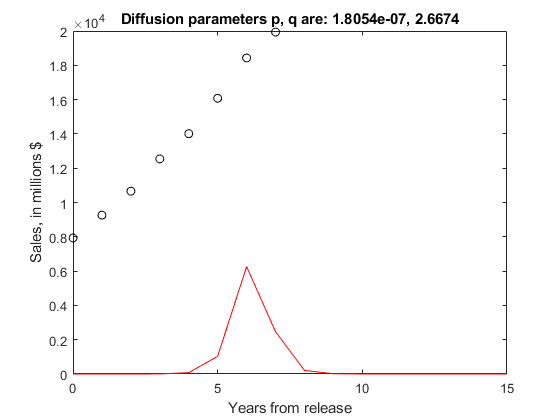

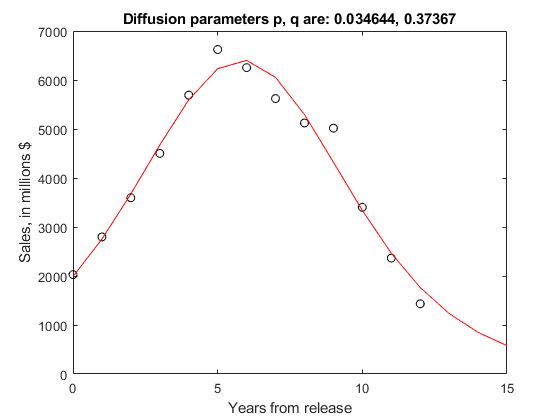

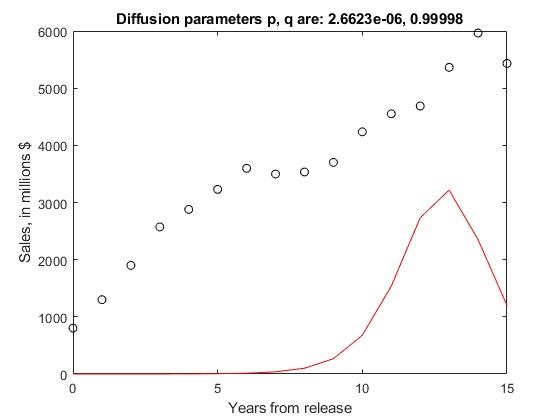

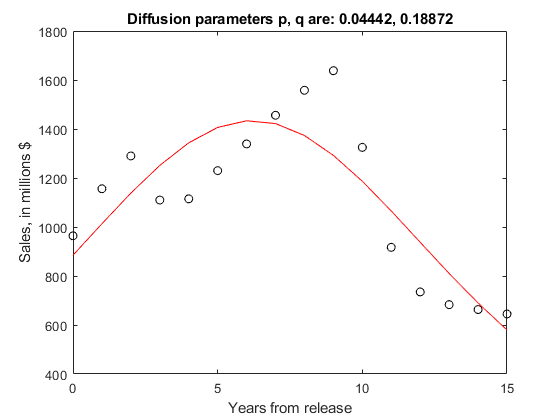

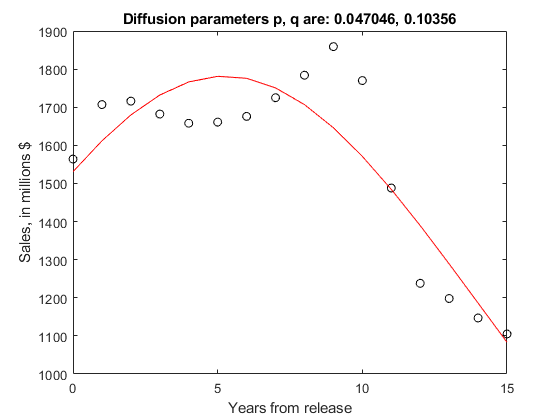

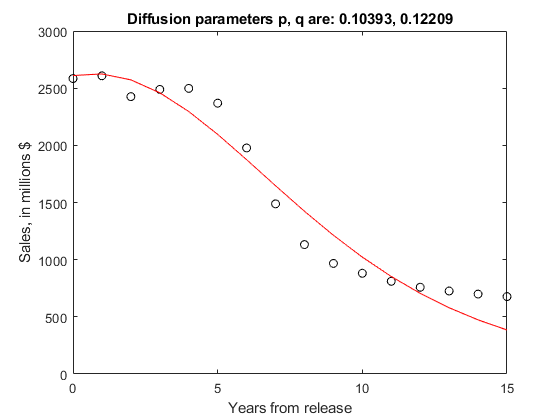

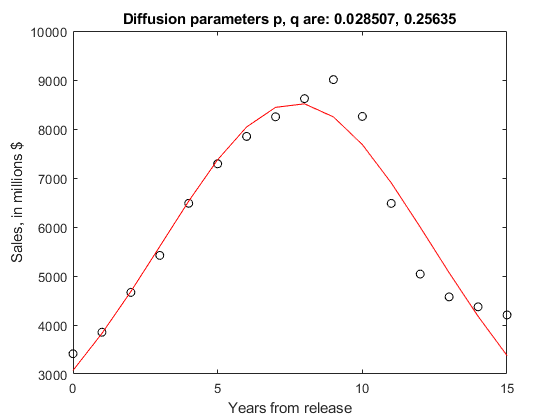

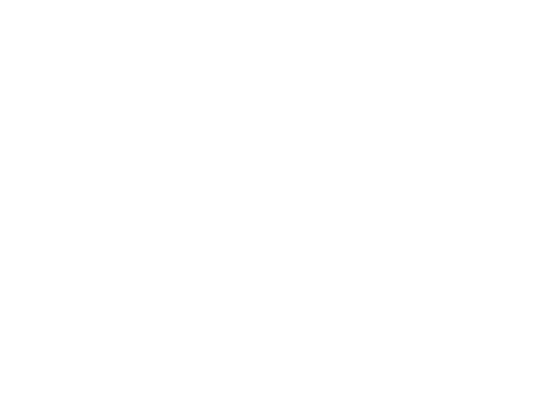

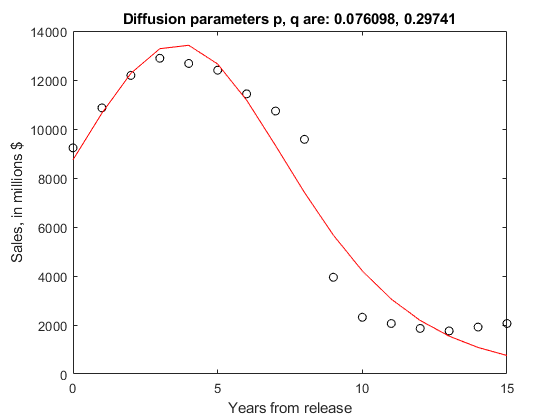

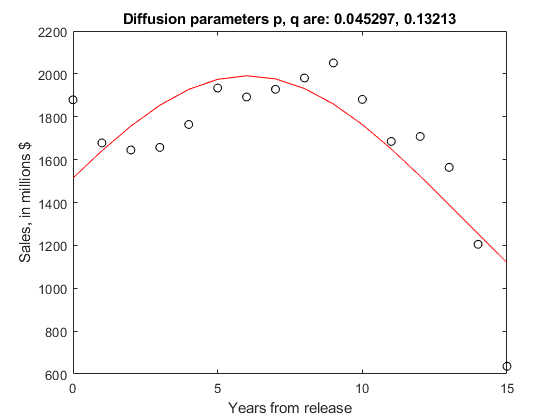

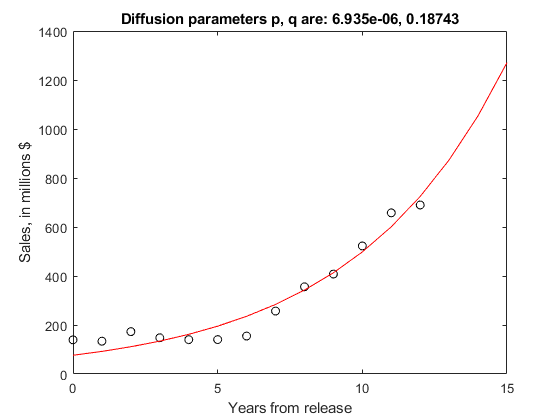

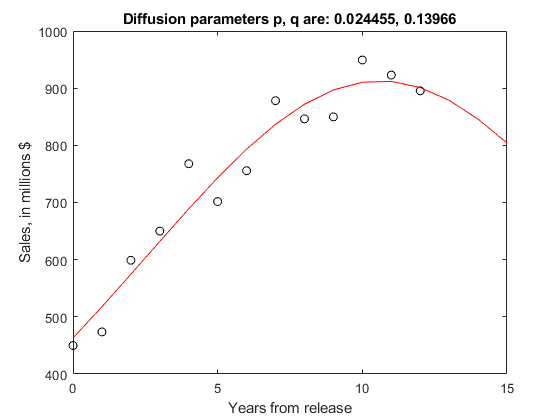

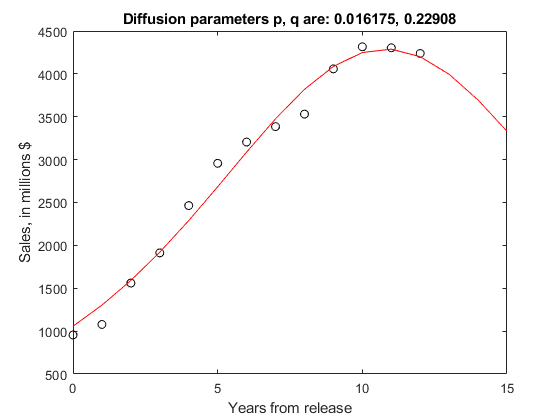

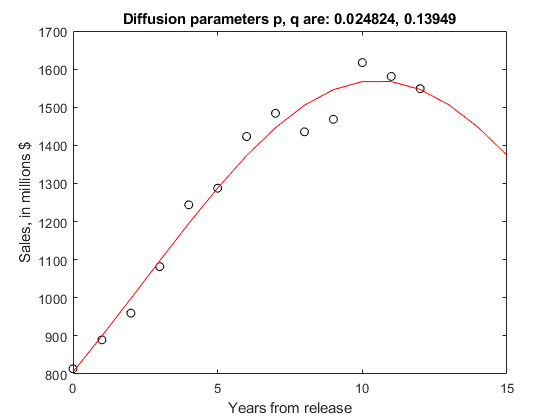

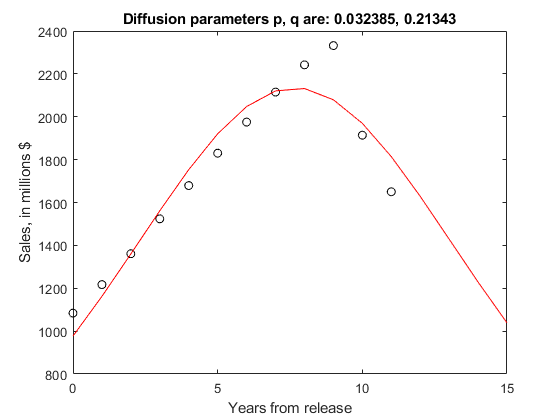

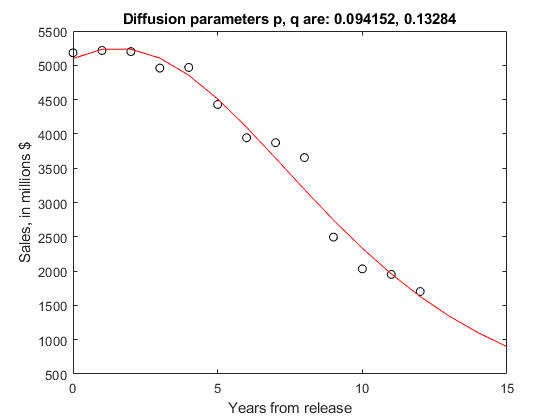

In [ ]:
figure
for i=1:size(t,2)
    figure
    plot(t(:,i),I(:,i),'ko')
    hold;
    plot(t,F_I(xI(:,i),t),'r')
    title(['Diffusion parameters p, q are: ', num2str(xI(1,i)),', ',num2str(xI(2,i))])
    xlabel('Years from release')
    ylabel('Sales, in millions $')
    
    
    

end


In [ ]:
%Values of p,q

p_value=xI(1,:)';
q_value=xI(2,:)';

%removing bad fits
q_value(15)=[];
p_value(15)=[];
q_value(5)=[];
p_value(5)=[];


NN_OUT=[p_value q_value]


NN_OUT =

     0.028507      0.25635
      0.10393      0.12209
     0.047046      0.10356
      0.04442      0.18872
     0.034644      0.37367
     0.094152      0.13284
     0.032385      0.21343
     0.024824      0.13949
     0.016175      0.22908
     0.024455      0.13966
    6.935e-06      0.18743
     0.045297      0.13213
     0.076098      0.29741




## p, q values for 13 drugs

In [ ]:
clear; clc

NN_OUT = [0.0285    0.2563
    0.1039    0.1221
    0.0470    0.1036
    0.0444    0.1887
    0.0346    0.3737
    0.0942    0.1328
    0.0324    0.2134
    0.0248    0.1395
    0.0162    0.2291
    0.0245    0.1397
    0.0000    0.1874
    0.0453    0.1321
    0.0761    0.2974]


NN_OUT =

       0.0285       0.2563
       0.1039       0.1221
        0.047       0.1036
       0.0444       0.1887
       0.0346       0.3737
       0.0942       0.1328
       0.0324       0.2134
       0.0248       0.1395
       0.0162       0.2291
       0.0245       0.1397
            0       0.1874
       0.0453       0.1321
       0.0761       0.2974




## Product attributes for the training set 

In [ ]:
X=readtable('C:\Users\Jimmy\Google Drive\Career\Job Apps\Insight_\Interview\Case Interview\Training_input.txt');
X=X(:,1:16);
X(:,16)=[];
X(:,6)=[];

X(:,1:7)


ans =

  9x7 table

                    Var1                     Avastin_Roche    Rituxan_Genentech    Herceptin_Genentech    Lucentis_Genentech    Crestor_Astrazenca    Nexium_Astrazeneca
    _____________________________________    _____________    _________________    ___________________    __________________    __________________    __________________

    'Novelty of drug, # of substitutes  '             1                  7                     1                     1                     5                     3      
    'Normalized Potential Market Size'          3.5e+08            1.5e+06               4.7e+08               1.1e+08               1.5e+09               4.5e+06      
    'Severity of disease '                         0.35                0.4                   0.1                     0                  0.25                     1      
    '# of clinical trials '                        1942               1592                   745                   459               

In [ ]:
%Normalizing input variables


for i=2:size(X,2)
NN_IN(:,i-1)=table2array(X(:,i));
end

mean_nn=mean(NN_IN,2);
range_nn=range(NN_IN,2);

for i=1:size(NN_IN,2)
    NN_IN(:,i)=(NN_IN(:,i)-mean_nn)./range_nn;
end


## Setting up artifical neural network

In [ ]:
% Setup the parameters for the Artifical Neural Network
input_layer_size  = 9;  % product attributes for each drug in the training set
hidden_layer_size = 500;   % 500 units in hidden layer 
output_layer = 2;          % output p,q values 


m = size(NN_IN, 2);


In [ ]:
% Random intialization of parameters 


initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, output_layer);

initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];

In [ ]:
% Implementing backpropogation to derive paramters for the ANN
options = optimset('MaxIter', 500);

%  Regularization parameter
lambda = 0.001;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                  output_layer, NN_IN, NN_OUT, lambda);

[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 output_layer, (hidden_layer_size + 1));

Iteration   500 | Cost: 6.581671e-01



## Calculating p,q values for the test data set from optimized parameters

In [ ]:
NN_IN_test=[5 4 2
5000000 75000000 300000000
0.69 0.05 0.05
169 58 96
5 2 5
180 750 180
0.95 0.79 0.74
0.97 0.5 0.4
228.2833333 74.66666667 78.11666667];


mean_nn_test=mean(NN_IN_test,2);
range_nn_test=range(NN_IN_test,2);

for i=1:size(NN_IN_test,2)
    NN_IN_test(:,i)=(NN_IN_test(:,i)-mean_nn_test)./range_nn_test;
end

NN_IN_test=[ones(1,3); NN_IN_test];

H_L_t=Theta1*NN_IN_test;

H_L_t=[ones(1,3); H_L_t];

P_Q_t=H_L_t'*Theta2';

In [ ]:
sales_figs = readtable('C:\Users\Jimmy\Google Drive\Career\Job Apps\Insight_\Interview\Case Interview\Inhibitor_sales_figs.txt');
Quarters = sales_figs(:,1); 

q=table2array(sales_figs(:,2));
t=(0.25:0.25:8.25); % renormalizing t in years 
J= table2array(sales_figs(:,6));
X= table2array(sales_figs(:,7));
O= table2array(sales_figs(:,10));



In [ ]:
%plotting the Bass function sym, in extended t

t1=(0.25:0.25:18.25); % renormalizing t in years 


F_J=4846.7*((0.00498)^-1)*((0.00498+0.52)^2)*(1+((0.52/0.00498).*exp(-(0.00498*t1)-(0.52*t1)))).^-2.*(exp(-(0.00498*t1)-(0.52*t1)));      

F_X=9810.3*((0.00174)^-1)*((0.00174+0.482)^2)*(1+((0.482/0.00174).*exp(-(0.00174*t1)-(0.482*t1)))).^-2.*(exp(-(0.00174*t1)-(0.482*t1)));  
  
F_O=3399.5*((0.0000027)^-1)*((0.0000027+1.106)^2)*(1+((1.106/0.0000027).*exp(-(0.0000027*t1)-(1.106*t1)))).^-2.*(exp(-(0.0000027*t1)-(1.106*t1)));   


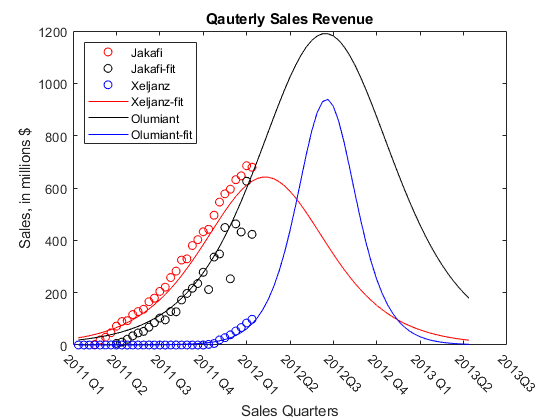

In [ ]:
% G=(-x(1)-x(2))./(x(2)+(x(1).*exp(-(x(1)*t)-(x(2)*t))));
plot(t,J,'ro')
hold on
plot(t,X,'ko')
plot(t,O,'bo')
plot(t1,F_J,'r')

plot(t1,F_X,'k')
plot(t1,F_O,'b')

title('Qauterly Sales Revenue')
xlabel('Sales Quarters')
ylabel('Sales, in millions $')
xticklabels(q)
xtickangle(315)
legend('Jakafi','Jakafi-fit','Xeljanz','Xeljanz-fit','Olumiant','Olumiant-fit','Location','NorthWest')

## Tuning the regularization parameter and number of hidden units 

In [ ]:
clear all
clc

NN_OUT =[     0.028507      0.25635
      0.10393      0.12209
     0.047046      0.10356
      0.04442      0.18872
     0.034644      0.37367
     0.094152      0.13284
     0.032385      0.21343
     0.024824      0.13949
     0.016175      0.22908
     0.024455      0.13966
    6.935e-06      0.18743
     0.045297      0.13213
     0.076098      0.29741];

h=[1:5:200]; % number of units in hidden layer 

l=logspace(-3,3,7); %regularization parameter 

P=zeros(13,length(h)*length(l));
Q=zeros(13,length(h)*length(l));

for i=1:length(h)
    for j=1:length(l)
        [P(:,i*j) Q(:,i*j)]=hyper(h(i),l(j));
        
        err_P(i,j)=(sum((NN_OUT(:,1)-P(:,i)).^2))/13;
        
        err_Q(i,j)=(sum((NN_OUT(:,2)-Q(:,i)).^2))/13;
        
    end
        
end


Iteration   447 | Cost: 6.596576e-01
Iteration   171 | Cost: 6.661172e-01
Iteration    65 | Cost: 6.717381e-01
Iteration    27 | Cost: 6.717381e-01
Iteration    33 | Cost: 6.717381e-01
Iteration    82 | Cost: 6.717381e-01
Iteration    74 | Cost: 6.717381e-01
Iteration   500 | Cost: 6.488896e-01
Iteration   500 | Cost: 6.652599e-01
Iteration   121 | Cost: 6.717381e-01
Iteration    43 | Cost: 6.717381e-01
Iteration    43 | Cost: 6.717381e-01
Iteration    68 | Cost: 6.717381e-01
Iteration   102 | Cost: 6.717381e-01
Iteration   500 | Cost: 6.502417e-01
Iteration   500 | Cost: 6.652497e-01
Iteration   149 | Cost: 6.717381e-01
Iteration    48 | Cost: 6.717381e-01
Iteration    44 | Cost: 6.717381e-01
Iteration    66 | Cost: 6.717381e-01
Iteration    68 | Cost: 6.717381e-01
Iteration   500 | Cost: 6.500494e-01
Iteration   500 | Cost: 6.652490e-01
Iteration   164 | Cost: 6.717381e-01
Iteration    68 | Cost: 6.717381e-01
Iteration    73 | Cost: 6.717381e-01
Iteration    73 | Cost: 6.717381e-01
I

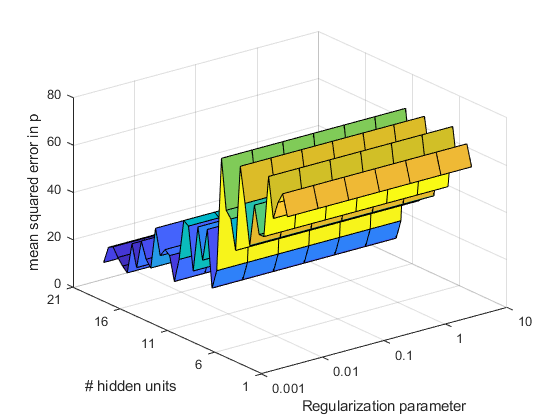

In [ ]:
surf(err_P)
xlabel('Regularization parameter')
xticklabels(l)
ylabel('# hidden units')
yticklabels(h)
zlabel('mean squared error in p')

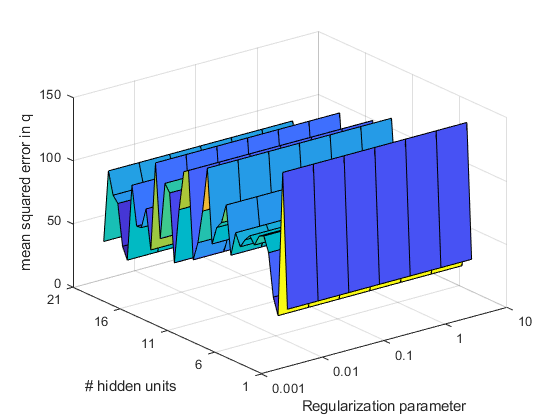

In [ ]:
surf(err_Q)
xlabel('Regularization parameter')
xticklabels(l)
ylabel('# hidden units')
yticklabels(h)
zlabel('mean squared error in q')

## Major Insights:
    1. Predicting pharma sales without relying on historical sales data
    2. Quantifying effects of product attributes (pricing, # clinical trials) on the future sales 
    3. Optimizing marketing strategies based on time-to-peak of sales for a new product 